In [1]:
import csv
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir = r"C:\Users\hp\Desktop\projects"
train_df = pd.read_csv(data_dir + "/Training.csv")
test_df = pd.read_csv(data_dir + "/Testing.csv")
train_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [3]:
train_df.info()
train_df.columns[30:60]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


Index(['indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation',
       'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine',
       'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload',
       'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise',
       'blurred_and_distorted_vision', 'phlegm', 'throat_irritation',
       'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion',
       'chest_pain', 'weakness_in_limbs', 'fast_heart_rate',
       'pain_during_bowel_movements'],
      dtype='object')

In [4]:
train_df["prognosis"].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

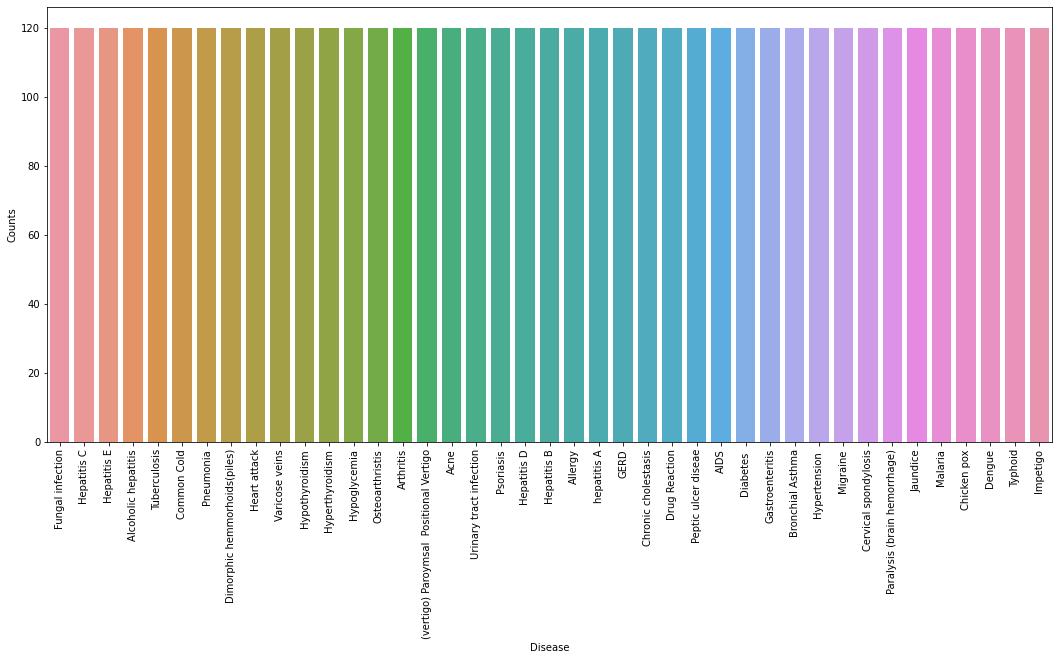

In [5]:
disease_counts = train_df["prognosis"].value_counts()
temp_df = pd.DataFrame({"Disease": disease_counts.index,"Counts": disease_counts.values})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

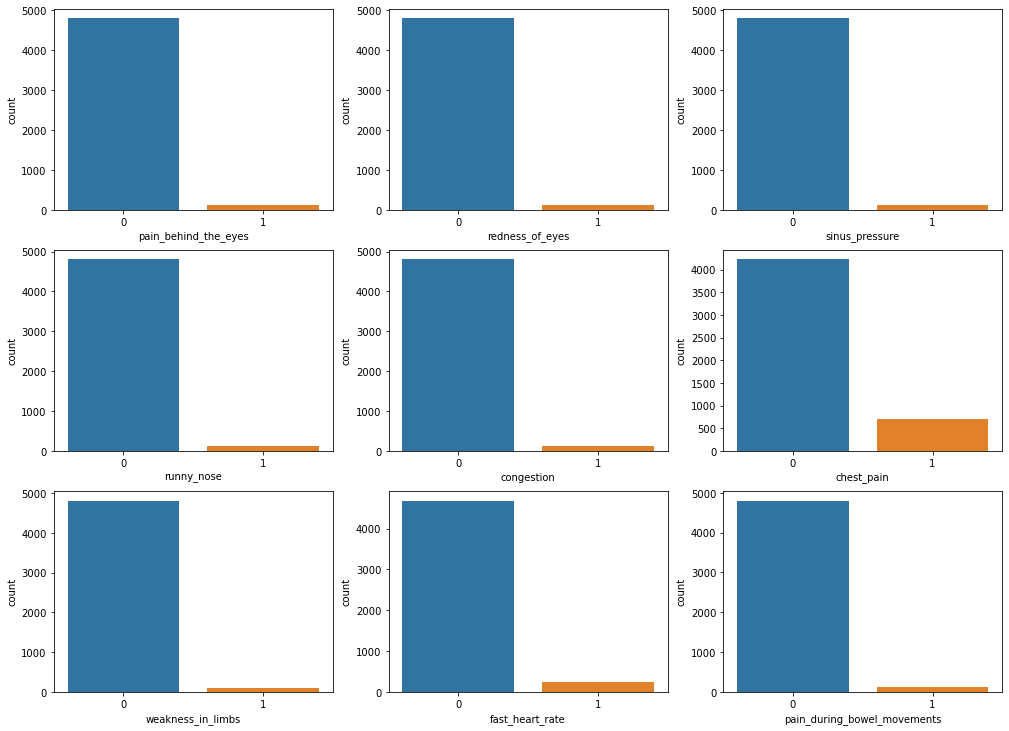

In [6]:
features = ['pain_behind_the_eyes', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion',
       'chest_pain', 'weakness_in_limbs', 'fast_heart_rate',
       'pain_during_bowel_movements']

plt.figure(figsize = (17,17))
for i, feature in enumerate(features):
    plt.subplot(4,3,i+1)
    sns.countplot(x = feature, data = train_df)
    plt.xlabel(feature)
plt.show()

In [7]:
train_df.drop("Unnamed: 133", axis = 1, inplace = True)
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x_train, y_train = train_df.loc[:,train_df.columns != "prognosis"], train_df.loc[:,"prognosis"]
x_test, y_test = test_df.loc[:,train_df.columns != "prognosis"], test_df.loc[:,"prognosis"]
print(f"Train: {x_train.shape}, {y_train.shape}")
print(f"Test: {x_test.shape}, {y_test.shape}")

Train: (4920, 132), (4920,)
Test: (42, 132), (42,)


In [9]:
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("KNN accuracy is: ",knn.score(x_test, y_test))

KNN accuracy is:  1.0


In [10]:
neighbors = np.arange(1,25)  
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

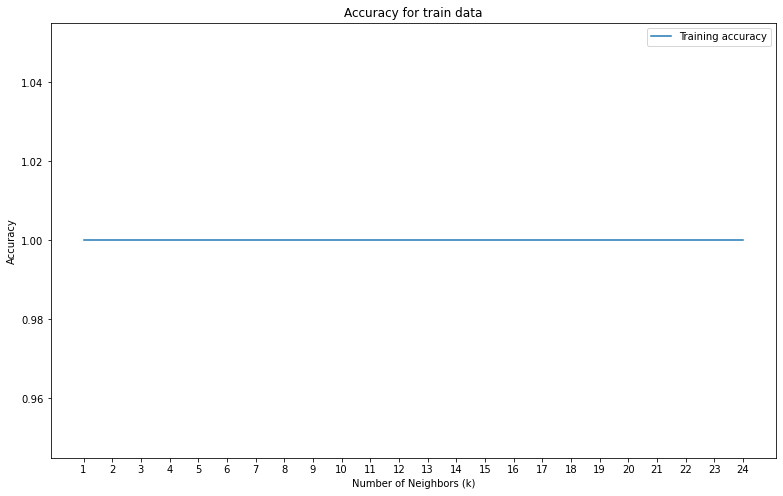

In [11]:
plt.figure(figsize = (13,8))
plt.plot(neighbors, train_accuracy, label = "Training accuracy")
plt.legend()
plt.title("Accuracy for train data")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(neighbors)
plt.show()

In [12]:
y_predictions = {"KNN": knn.predict(x_test)}

from sklearn.metrics import classification_report, confusion_matrix

for classifier, y_pred in y_predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    print(classifier,'Confusion matrix: \n',cm)
    print("------------------")
    print(classifier, 'Classification report: \n',classification_report(y_test,y_pred))

KNN Confusion matrix: 
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
------------------
KNN Classification report: 
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00        

In [13]:
#Cross Validation- K-fold cross validation
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
k = 5 
cv_result = cross_val_score(knn, x_train, y_train, cv = k) 
print("CV scores: ", cv_result)
print("CV scores average: ", np.sum(cv_result)/len(cv_result))

CV scores:  [1. 1. 1. 1. 1.]
CV scores average:  1.0


In [14]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt.predict(x_test)
dt.score(x_test, y_test)

0.9761904761904762

In [15]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.predict(x_test)
rfc.score(x_test, y_test)

0.9761904761904762

In [16]:
disease_pred = rfc.predict(x_train)
disease_real = y_train.values

In [17]:
for i in range(0, len(disease_real)):
    if disease_pred[i]==disease_real[i]:
        print ('Pred: {0}\nActual: {1}\n'.format(disease_pred[i], disease_real[i]))

Pred: Fungal infection
Actual: Fungal infection

Pred: Fungal infection
Actual: Fungal infection

Pred: Fungal infection
Actual: Fungal infection

Pred: Fungal infection
Actual: Fungal infection

Pred: Fungal infection
Actual: Fungal infection

Pred: Fungal infection
Actual: Fungal infection

Pred: Fungal infection
Actual: Fungal infection

Pred: Fungal infection
Actual: Fungal infection

Pred: Fungal infection
Actual: Fungal infection

Pred: Fungal infection
Actual: Fungal infection

Pred: Allergy
Actual: Allergy

Pred: Allergy
Actual: Allergy

Pred: Allergy
Actual: Allergy

Pred: Allergy
Actual: Allergy

Pred: Allergy
Actual: Allergy

Pred: Allergy
Actual: Allergy

Pred: Allergy
Actual: Allergy

Pred: Allergy
Actual: Allergy

Pred: Allergy
Actual: Allergy

Pred: Allergy
Actual: Allergy

Pred: GERD
Actual: GERD

Pred: GERD
Actual: GERD

Pred: GERD
Actual: GERD

Pred: GERD
Actual: GERD

Pred: GERD
Actual: GERD

Pred: GERD
Actual: GERD

Pred: GERD
Actual: GERD

Pred: GERD
Actual: GERD



Pred: Typhoid
Actual: Typhoid

Pred: hepatitis A
Actual: hepatitis A

Pred: Hepatitis B
Actual: Hepatitis B

Pred: Hepatitis C
Actual: Hepatitis C

Pred: Hepatitis D
Actual: Hepatitis D

Pred: Hepatitis E
Actual: Hepatitis E

Pred: Alcoholic hepatitis
Actual: Alcoholic hepatitis

Pred: Tuberculosis
Actual: Tuberculosis

Pred: Common Cold
Actual: Common Cold

Pred: Pneumonia
Actual: Pneumonia

Pred: Dimorphic hemmorhoids(piles)
Actual: Dimorphic hemmorhoids(piles)

Pred: Heart attack
Actual: Heart attack

Pred: Varicose veins
Actual: Varicose veins

Pred: Hypothyroidism
Actual: Hypothyroidism

Pred: Hyperthyroidism
Actual: Hyperthyroidism

Pred: Hypoglycemia
Actual: Hypoglycemia

Pred: Osteoarthristis
Actual: Osteoarthristis

Pred: Arthritis
Actual: Arthritis

Pred: (vertigo) Paroymsal  Positional Vertigo
Actual: (vertigo) Paroymsal  Positional Vertigo

Pred: Acne
Actual: Acne

Pred: Urinary tract infection
Actual: Urinary tract infection

Pred: Psoriasis
Actual: Psoriasis

Pred: Impeti

In [18]:
#Support Vector Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
svc.predict(x_test)
svc.score(x_test, y_test)

1.0

In [19]:
disease_pred = svc.predict(x_test)
disease_real = y_test.values

In [20]:
for i in range(0, len(disease_real)):
    if disease_pred[i]==disease_real[i]:
        print ('Pred: {0}\nActual: {1}\n'.format(disease_pred[i], disease_real[i]))

Pred: Fungal infection
Actual: Fungal infection

Pred: Allergy
Actual: Allergy

Pred: GERD
Actual: GERD

Pred: Chronic cholestasis
Actual: Chronic cholestasis

Pred: Drug Reaction
Actual: Drug Reaction

Pred: Peptic ulcer diseae
Actual: Peptic ulcer diseae

Pred: AIDS
Actual: AIDS

Pred: Diabetes 
Actual: Diabetes 

Pred: Gastroenteritis
Actual: Gastroenteritis

Pred: Bronchial Asthma
Actual: Bronchial Asthma

Pred: Hypertension 
Actual: Hypertension 

Pred: Migraine
Actual: Migraine

Pred: Cervical spondylosis
Actual: Cervical spondylosis

Pred: Paralysis (brain hemorrhage)
Actual: Paralysis (brain hemorrhage)

Pred: Jaundice
Actual: Jaundice

Pred: Malaria
Actual: Malaria

Pred: Chicken pox
Actual: Chicken pox

Pred: Dengue
Actual: Dengue

Pred: Typhoid
Actual: Typhoid

Pred: hepatitis A
Actual: hepatitis A

Pred: Hepatitis B
Actual: Hepatitis B

Pred: Hepatitis C
Actual: Hepatitis C

Pred: Hepatitis D
Actual: Hepatitis D

Pred: Hepatitis E
Actual: Hepatitis E

Pred: Alcoholic hepati

In [21]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(x_train, y_train)
logreg.predict(x_test)
logreg.score(x_test, y_test)

1.0

In [22]:
df_disease = train_df['prognosis']
df_disease.head()

0    Fungal infection
1    Fungal infection
2    Fungal infection
3    Fungal infection
4    Fungal infection
Name: prognosis, dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_df["prognosis"] = encoder.fit_transform(train_df["prognosis"])

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score
X = train_df.iloc[:,:-1]
y = train_df.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [25]:
from sklearn.naive_bayes import GaussianNB
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

test_data = pd.read_csv(data_dir + "/Testing.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

final_preds = [mode([i,j,k])[0][0] for i,j,
            k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model\
: {accuracy_score(test_Y, final_preds)*100}")

Accuracy on Test dataset by the combined model: 100.0


In [26]:
symptoms = x_train.columns.values

symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1

    input_data = np.array(input_data).reshape(1,-1)

    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": nb_prediction,
        "final_prediction":final_prediction
    }
    return predictions



print(predictDisease("High Fever,Knee Pain,Hip Joint Pain"))


{'rf_model_prediction': 'Osteoarthristis', 'naive_bayes_prediction': 'Osteoarthristis', 'svm_model_prediction': 'Osteoarthristis', 'final_prediction': 'Osteoarthristis'}


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [27]:
def predictDisease1():
    symptoms= txt.get()
    symptoms = symptoms.split(",")

    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1

    input_data = np.array(input_data).reshape(1,-1)

    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": nb_prediction,
        "final_prediction":final_prediction,
    }
    prd.set(predictions)
    print(predictions)
    return predictions

In [28]:
import tkinter as tk
from tkinter import *

window = tk.Tk()

window.geometry("1490x720")
window.resizable(True,False)
window.title("diseases prediction System")

tk.Label(window,text="Enter the symptoms to know the disease:",font =("Algerian",30,'bold') ).pack()

lbl = tk.Label(window, text="Enter symptoms:",width=20  ,height=1  ,fg="black"  ,bg="#00aeff" ,font=('times', 17, ' bold ') )
lbl.place(x=10, y=100)

txt = tk.Entry(window,width=32 ,fg="black",font=('times', 15, ' bold '))
txt.place(x=300, y=100)

Button = tk.Button(window, text="Submit", command=predictDisease1  ,fg="black"  ,bg="#ea2a2a"  ,width=11 ,activebackground = "white" ,font=('times', 17, ' bold '))
Button.place(x=210, y=150)

lb2 = tk.Label(window, text="Disease predected:",width=20  ,height=1  ,fg="black"  ,bg="#00aeff" ,font=('times', 17, ' bold ') )
lb2.place(x=10, y=225)

prd=StringVar()

lb3 = tk.Label(window, textvariable=prd,fg="black",font=('times', 15, ' bold ') )
lb3.place(x=10, y=270)

window.mainloop()

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


{'rf_model_prediction': 'Osteoarthristis', 'naive_bayes_prediction': 'Osteoarthristis', 'svm_model_prediction': 'Osteoarthristis', 'final_prediction': 'Osteoarthristis'}
